In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import plotly.graph_objects as go
import os

path = os.getcwd()

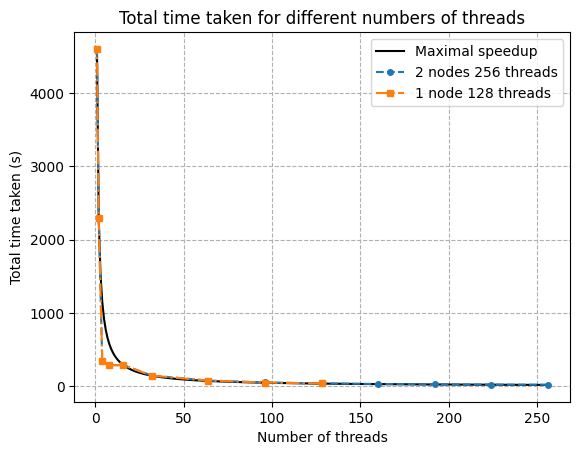

,Threads,Time
0,256,20.4035
1,224,22.0789
2,192,25.9489
3,160,30.8202
4,128,38.8450
5,96,51.3829
6,64,77.0509
7,32,145.0410
8,16,288.1760
9,8,288.0000


In [2]:
def parse_data(file_path):
	results = []
	current_threads = None
	
	try:
		with open(file_path, 'r') as file:
			for line in file:
				if line.startswith("Running with "):
					# Extract the number of threads, assuming it's the third word in the line
					parts = line.split()
					current_threads = int(parts[2])
				
				if "Total time taken:" in line:
					# Extract the total time, assuming it follows the colon
					time_parts = line.split()
					total_time = float(time_parts[3])  # The time is the fourth word in the line
					results.append((current_threads, total_time))
					
	except Exception as e:
		print(f"An error occurred: {e}")

	return results

one_run = pd.DataFrame(parse_data(path + '/one_run_EPYC.txt'), columns=['Threads', 'Time']).sort_values(by='Threads')

one_run.loc[0, 'Threads'] = 1

# Example usage: 
data256 = parse_data(path + '/2nodes256to2')
data128 = parse_data(path + '/1node128to2')
dataverbose128 = parse_data(path + '/ExceedinglyVerbose/EPYC20240504_105203')

# Convert the data to a pandas DataFrame
df256 = pd.DataFrame(data256, columns=["Threads", "Time"])
df128 = pd.DataFrame(data128, columns=["Threads", "Time"])
dfverbose128 = pd.DataFrame(dataverbose128, columns=["Threads", "Time"])
df256 = pd.concat([df256,	one_run], ignore_index=True)
df128 = pd.concat([df128,	one_run], ignore_index=True)

plt.figure()

# Define the x-values for the model function
x_values = np.linspace(1, 256, 256)  # Avoid starting from zero to prevent division by zero

# Model function line
plt.plot(x_values, one_run["Time"][0] / x_values, 'k-', label="Maximal speedup")  # Solid black line

# Data lines
plt.plot(df256["Threads"], df256["Time"], 'o--', label="2 nodes 256 threads", markersize=4)  # Dashed line with circle markers
plt.plot(df128["Threads"], df128["Time"], 's-.', label="1 node 128 threads", markersize=4)  # Dash-dot line with square markers

# Adding labels and title
plt.xlabel("Number of threads")
plt.ylabel("Total time taken (s)")
plt.title("Total time taken for different numbers of threads")

# Adding legend and grid
plt.legend()
plt.grid(True, which="both", linestyle='--')  # Grid with dashed lines for better visibility

# Saving the figure with high resolution
plt.savefig("time_plt.png", dpi=1200)

# Showing the plot
plt.show()

# Closing the figure
plt.close()

df256

In [3]:
# Define the x-values for the model function starting from 2 to prevent division by zero
x_values = np.linspace(1, 256, 256)

# Create the figure
fig = go.Figure()

# Model function line
fig.add_trace(go.Scatter(x=x_values, y= one_run["Time"][0] / x_values,
						 mode='lines', name='Maximal speedup',
						 line=dict(color='black', dash='dot')))

# Data lines
fig.add_trace(go.Scatter(x=df256["Threads"], y=df256["Time"],
						 mode='lines+markers', name='2 nodes 256 threads',
						 marker=dict(symbol='circle', size=8), line=dict(dash='dash')))
fig.add_trace(go.Scatter(x=df128["Threads"], y=df128["Time"],
						 mode='lines+markers', name='1 node 128 threads',
						 marker=dict(symbol='square', size=8), line=dict(dash='longdash')))
# Add a vertical line at 4, 64 and 128 threads
fig.add_shape(type="line", x0=64, y0=0, x1=64, y1=4.7*1e3, line=dict(color="grey", width=2, dash="solid"))
fig.add_shape(type="line", x0=128, y0=0, x1=128, y1=4.7*1e3, line=dict(color="grey", width=2, dash="solid"))

# Configuring the axes and layout
fig.update_layout(
	xaxis_title="Number of threads",
	yaxis_title="Total time taken (s)",
	title='Total time taken for different numbers of MPI threads',
	legend_title="Legend",
	template='plotly_white',
	xaxis=dict(type='linear', tickmode='array', tickvals=[1, 2, 4, 8, 16, 32, 64, 96, 128, 160, 192, 224, 256]),
	yaxis=dict(type='linear'),
	legend=dict(y=1, x=1),
	grid=dict(rows=1, columns=1),
	height = 900,
	width = 1504
)

# Adding grid lines with specified style
fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='lightgrey')
fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='lightgrey')

# Show the figure
fig.show()

# To save the plot as a static image, you will need to use Plotly Orca or Kaleido
fig.write_image("time_go.png", scale=2)  # Uncomment this line if Kaleido or Orca is installed

In [4]:
# Define the x-values for the model function starting from 2 to prevent division by zero
x_values = np.linspace(1, 256, 256)

# Create the figure
fig = go.Figure()

# Model function line
fig.add_trace(go.Scatter(x=x_values, y= one_run["Time"][0] / (x_values),
						 mode='lines', name='Maximal speedup',
						 line=dict(color='black', dash='dot')))

# Data lines
fig.add_trace(go.Scatter(x=df256["Threads"], y=df256["Time"],
						 mode='lines+markers', name='2 nodes 256 threads',
						 marker=dict(symbol='circle', size=8), line=dict(dash='dash')))
fig.add_trace(go.Scatter(x=df128["Threads"], y=df128["Time"],
						 mode='lines+markers', name='1 node 128 threads',
						 marker=dict(symbol='square', size=8), line=dict(dash='longdash')))
# Add a vertical line at 4, 64 and 128 threads
fig.add_shape(type="line", x0=4, y0=10, x1=4, y1=3*1e3, line=dict(color="grey", width=2, dash="solid"))
fig.add_shape(type="line", x0=64, y0=10, x1=64, y1=3*1e3, line=dict(color="grey", width=2, dash="solid"))
fig.add_shape(type="line", x0=128, y0=10, x1=128, y1=3*1e3, line=dict(color="grey", width=2, dash="solid"))

# Configuring the axes and layout
fig.update_layout(
	xaxis_title="Number of threads",
	yaxis_title="Total time taken (s)",
	title='Total time taken for different numbers of MPI threads',
	legend_title="Legend",
	template='plotly_white',
	xaxis=dict(type='log', tickmode='array', tickvals=[1, 2, 4, 8, 16, 32, 64, 96, 128, 160, 192, 224, 256]),
	yaxis=dict(type='log'),
	legend=dict(y=1, x=1),
	grid=dict(rows=1, columns=1),
	height = 900,
	width = 1504
)

# Adding grid lines with specified style
fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='lightgrey')
fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='lightgrey')

# Show the figure
fig.show()

# To save the plot as a static image, you will need to use Plotly Orca or Kaleido
fig.write_image("time_go_log5.png", scale=2)  # Uncomment this line if Kaleido or Orca is installed

In [5]:
def parse_data2(file_path):
	results = []
	current_threads = None
	
	try:
		with open(file_path, 'r') as file:
			for line in file:
				if line.startswith("Running with "):
					# Extract the number of threads, assuming it's the third word in the line
					parts = line.split()
					current_threads = int(parts[2])
				
				if "Process" in line:
					# Extract the total time, assuming it follows the colon
					time_parts = line.split()
					total_time = float(time_parts[5])  # The time is the fourth word in the line
					results.append((current_threads, total_time))

	except Exception as e:
		print(f"An error occurred: {e}")
	
	return results

data256_var = parse_data2(path + '/2nodes256to2')
data128_var = parse_data2(path + '/1node128to2')
dataverbose128_var = parse_data2(path + '/ExceedinglyVerbose/EPYC20240504_105203')

# Convert the data to a pandas DataFrame
df256_var = pd.DataFrame(data256_var, columns=["Threads", "Time"])
df128_var = pd.DataFrame(data128_var, columns=["Threads", "Time"])
dfverbose128_var = pd.DataFrame(dataverbose128_var, columns=["Threads", "Time"])

def variance_calculator(df):
	df['Variance'] = df.groupby('Threads')['Time'].transform('var')
	df.drop(columns=['Time'], inplace=True)
	df.drop_duplicates(inplace=True)
	df.reset_index(drop=True, inplace=True)

variance_calculator(df256_var)
variance_calculator(df128_var)
variance_calculator(dfverbose128_var)

df256_merged = df256.merge(df256_var, on='Threads').copy()
df128_merged = df128.merge(df128_var, on='Threads').copy()
dfverbose128_merged = dfverbose128.merge(dfverbose128_var, on='Threads').copy()

In [6]:
files_in_dir = os.listdir()

no_omp_code_run_names = list(filter(lambda x: 'NOo' in x, files_in_dir))
omp_code_run_names = list(filter(lambda x: 'C_omp2' in x, files_in_dir))
original_code_run_names = list(filter(lambda x: 'original' in x, files_in_dir))

no_omp_code_run = pd.DataFrame()
no_omp_code_run_var = pd.DataFrame()

omp_code_run = pd.DataFrame()
omp_code_run_var = pd.DataFrame()

original_code_run = pd.DataFrame()
original_code_run_var = pd.DataFrame()

df_var = no_omp_code_run_var
def data_loader(df, df_var, name_list):
	for name in name_list:
		parsed_data = pd.DataFrame(parse_data(path + '/' + name), columns = ['Threads', 'Time'])
		if not parsed_data['Time'].empty:
			df[name] = [parsed_data]
			df_var[name] = [parse_data2(path + '/' + name)]

data_loader(no_omp_code_run, no_omp_code_run_var, no_omp_code_run_names)
data_loader(omp_code_run, omp_code_run_var, omp_code_run_names)
data_loader(original_code_run, original_code_run_var, original_code_run_names)


omp_code_run


,EPYC_omp20240509_003032,EPYC_omp20240508_223600
0,Threads Time 0 128 37.8041 1 ...,Threads Time 0 128 39.8570 1 ...


In [7]:
# Define the x-values for the model function starting from 2 to prevent division by zero
x_values = np.linspace(1, 256, 256)

# Create the figure
fig = go.Figure()

# Model function line
fig.add_trace(go.Scatter(x=x_values, y= one_run["Time"][0] / (x_values),
						 mode='lines', name='Maximal speedup',
						 line=dict(color='black', dash='dot')))

# Data lines
for names in no_omp_code_run.columns:
	fig.add_trace(go.Scatter(x=no_omp_code_run[names][0]["Threads"], y=no_omp_code_run[names][0]["Time"],
							mode='lines+markers', name="Code doesn't include  OMP",
							marker=dict(symbol='circle', size=8), line=dict(dash='dash')))

for names in omp_code_run.columns:
	fig.add_trace(go.Scatter(x=omp_code_run[names][0]["Threads"], y=omp_code_run[names][0]["Time"],
							mode='lines+markers', name='Code includes OMP but with OMP_NUM_THREADS=1',
							marker=dict(symbol='circle', size=8), line=dict(dash='dash')))

for names in original_code_run.columns:
	fig.add_trace(go.Scatter(x=original_code_run[names][0]["Threads"], y=original_code_run[names][0]["Time"],
							mode='lines+markers', name='Code includes OMP, no limits set',
							marker=dict(symbol='circle', size=8), line=dict(dash='dash')))

fig.add_trace(go.Scatter(x=df256["Threads"], y=df256["Time"],
						 mode='lines+markers', name='2 nodes 256 threads, including epyc005 (old run)',
						 marker=dict(symbol='square', size=8), line=dict(dash='longdash')))

fig.add_trace(go.Scatter(x=df128["Threads"], y=df128["Time"],
						 mode='lines+markers', name='1 node 128 threads, including epyc005 (old run)',
						 marker=dict(symbol='square', size=8), line=dict(dash='longdash')))
# Add a vertical line at 4, 64 and 128 threads
fig.add_shape(type="line", x0=4, y0=10, x1=4, y1=3*1e3, line=dict(color="grey", width=2, dash="solid"))
fig.add_shape(type="line", x0=8, y0=10, x1=8, y1=3*1e3, line=dict(color="grey", width=2, dash="solid"))
fig.add_shape(type="line", x0=64, y0=10, x1=64, y1=3*1e3, line=dict(color="grey", width=2, dash="solid"))
fig.add_shape(type="line", x0=128, y0=10, x1=128, y1=3*1e3, line=dict(color="grey", width=2, dash="solid"))

# Configuring the axes and layout
fig.update_layout(
	xaxis_title="Number of threads",
	yaxis_title="Total time taken (s)",
	title='Total time taken for different kinds of run, depending on the number of MPI threads, log-log scale',
	legend_title="Legend",
	template='plotly_white',
	xaxis=dict(type='log', tickmode='array', tickvals=[1, 2, 4, 8, 16, 32, 64, 96, 128, 160, 192, 224, 256]),
	yaxis=dict(type='log'),
	legend=dict(y=1, x=1),
	grid=dict(rows=1, columns=1),
	height = 900,
	width = 1504
)

# Adding grid lines with specified style
fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='lightgrey')
fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='lightgrey')

# Show the figure
fig.show()

# To save the plot as a static image, you will need to use Plotly Orca or Kaleido
fig.write_image("time_go_log5.png", scale=2)  # Uncomment this line if Kaleido or Orca is installed

In [8]:
# Define the x-values for the model function starting from 2 to prevent division by zero
x_values = np.linspace(1, 256, 256)

# Create the figure
fig = go.Figure()

# Model function line
fig.add_trace(go.Scatter(x=x_values, y= one_run["Time"][0] / (x_values),
						 mode='lines', name='Maximal speedup',
						 line=dict(color='black', dash='dot')))

# Data lines
for names in no_omp_code_run.columns:
	fig.add_trace(go.Scatter(x=no_omp_code_run[names][0]["Threads"], y=no_omp_code_run[names][0]["Time"],
							mode='lines+markers', name='1 node, no OMP, after 4th of may',
							marker=dict(symbol='circle', size=8), line=dict(dash='dash')))

for names in omp_code_run.columns:
	fig.add_trace(go.Scatter(x=omp_code_run[names][0]["Threads"], y=omp_code_run[names][0]["Time"],
							mode='lines+markers', name='1 node, OMP with OMP_NUM_THREADS=1, after 4th of may',
							marker=dict(symbol='circle', size=8), line=dict(dash='dash')))

for names in original_code_run.columns:
	fig.add_trace(go.Scatter(x=original_code_run[names][0]["Threads"], y=original_code_run[names][0]["Time"],
							mode='lines+markers', name='1 node, original code with no limits, after 4th of may',
							marker=dict(symbol='circle', size=8), line=dict(dash='dash')))

fig.add_trace(go.Scatter(x=df256["Threads"], y=df256["Time"],
						 mode='lines+markers', name='2 nodes 256 threads, 4th of May',
						 marker=dict(symbol='square', size=8), line=dict(dash='longdash')))

fig.add_trace(go.Scatter(x=df128["Threads"], y=df128["Time"],
						 mode='lines+markers', name='1 node 128 threads, 4th of May',
						 marker=dict(symbol='square', size=8), line=dict(dash='longdash')))
# Add a vertical line at 4, 64 and 128 threads
fig.add_shape(type="line", x0=4, y0=10, x1=4, y1=3*1e3, line=dict(color="grey", width=2, dash="solid"))
fig.add_shape(type="line", x0=8, y0=10, x1=8, y1=3*1e3, line=dict(color="grey", width=2, dash="solid"))
fig.add_shape(type="line", x0=64, y0=10, x1=64, y1=3*1e3, line=dict(color="grey", width=2, dash="solid"))
fig.add_shape(type="line", x0=128, y0=10, x1=128, y1=3*1e3, line=dict(color="grey", width=2, dash="solid"))

# Configuring the axes and layout
fig.update_layout(
	xaxis_title="Number of threads",
	yaxis_title="Total time taken (s)",
	title='Total time taken for different kinds of run, depending on the number of MPI threads, log-linear scale',
	legend_title="Legend",
	template='plotly_white',
	xaxis=dict(type='log', tickmode='array', tickvals=[1, 2, 4, 8, 16, 32, 64, 96, 128, 160, 192, 224, 256]),
	yaxis=dict(type='linear'),
	legend=dict(y=1, x=1),
	grid=dict(rows=1, columns=1),
	height = 900,
	width = 1504
)

# Adding grid lines with specified style
fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='lightgrey')
fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='lightgrey')

# Show the figure
fig.show()

# To save the plot as a static image, you will need to use Plotly Orca or Kaleido
fig.write_image("time_go_log5.png", scale=2)  # Uncomment this line if Kaleido or Orca is installed

In [9]:
# Define the x-values for the model function starting from 2 to prevent division by zero
x_values = np.linspace(1, 256, 256)

# Create the figure
fig = go.Figure()

# Model function line
fig.add_trace(go.Scatter(x=x_values, y= one_run["Time"][0] / (x_values),
						 mode='lines', name='Maximal speedup',
						 line=dict(color='black', dash='dot')))

# Data lines
for names in no_omp_code_run.columns:
	fig.add_trace(go.Scatter(x=no_omp_code_run[names][0]["Threads"], y=no_omp_code_run[names][0]["Time"],
							mode='lines+markers', name='1 node, no OMP, after 4th of may',
							marker=dict(symbol='circle', size=8), line=dict(dash='dash')))

for names in omp_code_run.columns:
	fig.add_trace(go.Scatter(x=omp_code_run[names][0]["Threads"], y=omp_code_run[names][0]["Time"],
							mode='lines+markers', name='1 node, OMP with OMP_NUM_THREADS=1, after 4th of may',
							marker=dict(symbol='circle', size=8), line=dict(dash='dash')))

for names in original_code_run.columns:
	fig.add_trace(go.Scatter(x=original_code_run[names][0]["Threads"], y=original_code_run[names][0]["Time"],
							mode='lines+markers', name='1 node, original code with no limits, after 4th of may',
							marker=dict(symbol='circle', size=8), line=dict(dash='dash')))

fig.add_trace(go.Scatter(x=df256["Threads"], y=df256["Time"],
						 mode='lines+markers', name='2 nodes 256 threads, 4th of May',
						 marker=dict(symbol='square', size=8), line=dict(dash='longdash')))

fig.add_trace(go.Scatter(x=df128["Threads"], y=df128["Time"],
						 mode='lines+markers', name='1 node 128 threads, 4th of May',
						 marker=dict(symbol='square', size=8), line=dict(dash='longdash')))
# # Add a vertical line at 4, 64 and 128 threads
# max_line = 2467
# fig.add_shape(type="line", x0=4, y0=0, x1=4, y1=max_line, line=dict(color="grey", width=2, dash="solid"))
# fig.add_shape(type="line", x0=8, y0=0, x1=8, y1=max_line, line=dict(color="grey", width=2, dash="solid"))
# fig.add_shape(type="line", x0=64, y0=0, x1=64, y1=max_line, line=dict(color="grey", width=2, dash="solid"))
# fig.add_shape(type="line", x0=128, y0=0, x1=128, y1=max_line, line=dict(color="grey", width=2, dash="solid"))

# Configuring the axes and layout
fig.update_layout(
	xaxis_title="Number of threads",
	yaxis_title="Total time taken (s)",
	title='Total time taken for different kinds of run, depending on the number of MPI threads, linear-linear scale',
	legend_title="Legend",
	template='plotly_white',
	xaxis=dict(type='linear', tickmode='array', tickvals=[2, 4, 8, 16, 32, 64, 96, 128, 160, 192, 224, 256]),
	yaxis=dict(type='linear'),
	legend=dict(y=1, x=1),
	grid=dict(rows=1, columns=1),
	height = 900,
	width = 1504
)

# Adding grid lines with specified style
fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='lightgrey')
fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='lightgrey')

# Show the figure
fig.show()

# To save the plot as a static image, you will need to use Plotly Orca or Kaleido
fig.write_image("time_go_log5.png", scale=2)  # Uncomment this line if Kaleido or Orca is installed

In [10]:
weak_scaling = pd.DataFrame(parse_data(path+'/weak_scaling.out'), columns=['Threads', 'Time'])

fig = go.Figure()
fig.add_trace(go.Scatter(x=weak_scaling["Threads"], y=weak_scaling["Time"],
                         mode='lines+markers', name='Weak scaling on 2 nodes',
                         marker=dict(symbol='square', size=8), line=dict(dash='solid')))

# Configuring the axes and layout
fig.update_layout(
    xaxis_title="Number of threads",
    yaxis_title="Total time taken (s)",
    title='Weak scaling on 2 nodes, with fixed vertical resolution and horizontal resolution proportional to the number of threads',
    legend_title="Legend",
    template='plotly_white',
    xaxis=dict(type='log', tickmode='array', tickvals=[1, 2, 4, 8, 16, 32, 64, 128, 256]),
    yaxis=dict(type='linear', tickmode='array', tickvals=[0, 5, 10, 15, 20], range=[0, 21]),
    legend=dict(y=1, x=1),
    grid=dict(rows=1, columns=1),
    height=900,
    width=1504
)

fig.show()

In [11]:
def parse_data3(file_path):
    results = []
    current_threads = None

    try:
        with open(file_path, 'r') as file:
            for line in file:
                if "," in line:
                    # Extract the number of threads, assuming it's the third word in the line
                    parts = line.split()
                    current_threads = int(parts[0].rstrip(','))

                if "Total time taken: " in line:
                    # Extract the total time, assuming it follows the colon
                    time_parts = line.split()
                    total_time = float(time_parts[-2])  # The time is the last word in the line
                    results.append((current_threads, total_time))

    except Exception as e:
        print(f"An error occurred: {e}")

    return results

x_values = np.linspace(1, 128, 128)

omp_scaling1 = pd.DataFrame(parse_data3(path + '/OMPscaling.out'), columns=['Threads', 'Time']).sort_values(by='Threads')

omp_scaling2 = pd.DataFrame(parse_data3(path + '/OMPscaling2.out'), columns=['Threads', 'Time']).sort_values(by='Threads')

omp_scaling1 = pd.concat([one_run, omp_scaling2], ignore_index=True)
omp_scaling2 = pd.concat([one_run, omp_scaling2], ignore_index=True)

fig = go.Figure()

# Model function line
fig.add_trace(go.Scatter(x=x_values, y= one_run["Time"][0] / (x_values),
						 mode='lines', name='Maximal speedup',
						 line=dict(color='black', dash='dot')))

fig.add_trace(go.Scatter(x=omp_scaling1["Threads"], y=omp_scaling1["Time"],
						mode='lines+markers', name='OMP 1 node',
						marker=dict(symbol='square', size=8), line=dict(dash='solid')))
fig.add_trace(go.Scatter(x=omp_scaling2["Threads"], y=omp_scaling2["Time"],
						mode='lines+markers', name='OMP 1 node',
						marker=dict(symbol='square', size=8), line=dict(dash='solid')))

# Configuring the axes and layout
fig.update_layout(
	xaxis_title="Number of threads",
	yaxis_title="Total time taken (s)",
	title='OMP scaling on 1 node',
	legend_title="Legend",
	template='plotly_white',
	xaxis=dict(type='log', tickmode='array', tickvals=[1, 2, 4, 8, 16, 32, 64, 96, 128]),
	yaxis=dict(type='log', tickmode='array'),
	legend=dict(y=1, x=1),
	grid=dict(rows=1, columns=1),
	height=900,
	width=1504
)
fig.show()

In [12]:
x_values = np.linspace(1, 256, 256)

mpi_scaling = pd.DataFrame(parse_data(path + '/MPI_scaling.out'), columns=['Threads', 'Time']).sort_values(by='Threads')
mpi_scaling = pd.concat([one_run, mpi_scaling], ignore_index=True)

fig = go.Figure()

# Model function line
fig.add_trace(go.Scatter(x=x_values, y=one_run["Time"][0] / x_values,
						 mode='lines', name='Maximal speedup',
						 line=dict(color='black', dash='dot')))

fig.add_trace(go.Scatter(x=mpi_scaling["Threads"], y=mpi_scaling["Time"],
						mode='lines+markers', name='MPI 2 nodes',
						marker=dict(symbol='square', size=8), line=dict(dash='solid')))

# Data lines
for names in no_omp_code_run.columns:
	fig.add_trace(go.Scatter(x=no_omp_code_run[names][0]["Threads"], y=no_omp_code_run[names][0]["Time"],
							mode='lines+markers', name='MPI 1 node',
							marker=dict(symbol='circle', size=8), line=dict(dash='dash')))

for names in omp_code_run.columns:
	fig.add_trace(go.Scatter(x=omp_code_run[names][0]["Threads"], y=omp_code_run[names][0]["Time"],
							mode='lines+markers', name='MPI 1 node',
							marker=dict(symbol='circle', size=8), line=dict(dash='dash')))

for names in original_code_run.columns:
	fig.add_trace(go.Scatter(x=original_code_run[names][0]["Threads"], y=original_code_run[names][0]["Time"],
							mode='lines+markers', name='MPI 1 node',
							marker=dict(symbol='circle', size=8), line=dict(dash='dash')))

fig.add_trace(go.Scatter(x=df256["Threads"], y=df256["Time"],
						 mode='lines+markers', name='MPI 2 nodes, strange run',
						 marker=dict(symbol='square', size=8), line=dict(dash='longdash')))

fig.add_trace(go.Scatter(x=df128["Threads"], y=df128["Time"],
						 mode='lines+markers', name='MPI 2 nodes, strange run',
						 marker=dict(symbol='square', size=8), line=dict(dash='longdash')))

# Configuring the axes and layout
fig.update_layout(
	xaxis_title="Number of threads",
	yaxis_title="Total time taken (s)",
	title='MPI scaling on 1 and 2 node',
	legend_title="Legend",
	template='plotly_white',
	xaxis=dict(type='log', tickmode='array', tickvals=[1, 2, 4, 8, 16, 32, 64, 96, 128, 256]),
	yaxis=dict(type='log', tickmode='array'),
	legend=dict(y=1, x=1),
	grid=dict(rows=1, columns=1),
	height=900,
	width=1504
)
fig.show()

In [13]:
fig = go.Figure()


fig.add_trace(go.Scatter(x=mpi_scaling["Threads"], y=mpi_scaling["Time"],
						mode='lines+markers', name='MPI 2 nodes',
						marker=dict(symbol='square', size=8), line=dict(dash='solid')))

# Data lines
for names in no_omp_code_run.columns:
	fig.add_trace(go.Scatter(x=no_omp_code_run[names][0]["Threads"], y=no_omp_code_run[names][0]["Time"],
							mode='lines+markers', name='MPI 1 node',
							marker=dict(symbol='circle', size=8), line=dict(dash='dash')))

for names in omp_code_run.columns:
	fig.add_trace(go.Scatter(x=omp_code_run[names][0]["Threads"], y=omp_code_run[names][0]["Time"],
							mode='lines+markers', name='MPI 1 node',
							marker=dict(symbol='circle', size=8), line=dict(dash='dash')))

for names in original_code_run.columns:
	fig.add_trace(go.Scatter(x=original_code_run[names][0]["Threads"], y=original_code_run[names][0]["Time"],
							mode='lines+markers', name='1 node',
							marker=dict(symbol='circle', size=8), line=dict(dash='dash')))

fig.add_trace(go.Scatter(x=df256["Threads"], y=df256["Time"],
						 mode='lines+markers', name='MPI 2 nodes, strange run',
						 marker=dict(symbol='square', size=8), line=dict(dash='longdash')))

fig.add_trace(go.Scatter(x=df128["Threads"], y=df128["Time"],
						 mode='lines+markers', name='MPI 2 nodes, strange run',
						 marker=dict(symbol='square', size=8), line=dict(dash='longdash')))

fig.add_trace(go.Scatter(x=omp_scaling1["Threads"], y=omp_scaling1["Time"],
						mode='lines+markers', name='OMP 1 node',
						marker=dict(symbol='square', size=8), line=dict(dash='solid')))
fig.add_trace(go.Scatter(x=omp_scaling2["Threads"], y=omp_scaling2["Time"],
						mode='lines+markers', name='OMP 1 node',
						marker=dict(symbol='square', size=8), line=dict(dash='solid')))


# Model function line
fig.add_trace(go.Scatter(x=x_values, y=one_run["Time"][0] / x_values,
						 mode='lines', name='Maximal speedup',
						 line=dict(color='black', dash='dot')))

# Configuring the axes and layout
fig.update_layout(
	xaxis_title="Number of threads",
	yaxis_title="Total time taken (s)",
	title='Comparison of MPI and OMP scaling',
	legend_title="Legend",
	template='plotly_white',
	xaxis=dict(type='log', tickmode='array', tickvals=[2, 4, 8, 16, 32, 64, 96, 128, 160, 192, 224, 256]),
	yaxis=dict(type='log', tickmode='array'),
	legend=dict(y=1, x=1),
	grid=dict(rows=1, columns=1),
	height=900,
	width=1504
)
fig.show()

In [14]:
fig = go.Figure()


fig.add_trace(go.Scatter(x=mpi_scaling["Threads"], y=mpi_scaling["Time"],
						mode='lines+markers', name='MPI 2 nodes',
						marker=dict(symbol='square', size=8), line=dict(dash='solid')))

# Data lines
for names in no_omp_code_run.columns:
	fig.add_trace(go.Scatter(x=no_omp_code_run[names][0]["Threads"], y=no_omp_code_run[names][0]["Time"],
							mode='lines+markers', name='MPI 1 node',
							marker=dict(symbol='circle', size=8), line=dict(dash='dash')))

for names in omp_code_run.columns:
	fig.add_trace(go.Scatter(x=omp_code_run[names][0]["Threads"], y=omp_code_run[names][0]["Time"],
							mode='lines+markers', name='MPI 1 node',
							marker=dict(symbol='circle', size=8), line=dict(dash='dash')))

for names in original_code_run.columns:
	fig.add_trace(go.Scatter(x=original_code_run[names][0]["Threads"], y=original_code_run[names][0]["Time"],
							mode='lines+markers', name='1 node',
							marker=dict(symbol='circle', size=8), line=dict(dash='dash')))

fig.add_trace(go.Scatter(x=df256["Threads"], y=df256["Time"],
						 mode='lines+markers', name='MPI 2 nodes, strange run',
						 marker=dict(symbol='square', size=8), line=dict(dash='longdash')))

fig.add_trace(go.Scatter(x=df128["Threads"], y=df128["Time"],
						 mode='lines+markers', name='MPI 2 nodes, strange run',
						 marker=dict(symbol='square', size=8), line=dict(dash='longdash')))

fig.add_trace(go.Scatter(x=omp_scaling1["Threads"], y=omp_scaling1["Time"],
						mode='lines+markers', name='OMP 1 node',
						marker=dict(symbol='square', size=8), line=dict(dash='solid')))
fig.add_trace(go.Scatter(x=omp_scaling2["Threads"], y=omp_scaling2["Time"],
						mode='lines+markers', name='OMP 1 node',
						marker=dict(symbol='square', size=8), line=dict(dash='solid')))


# Model function line
fig.add_trace(go.Scatter(x=x_values, y=one_run["Time"][0] / x_values,
						 mode='lines', name='Maximal speedup',
						 line=dict(color='black', dash='dot')))

# Configuring the axes and layout
fig.update_layout(
	xaxis_title="Number of threads",
	yaxis_title="Total time taken (s)",
	title='Comparison of MPI and OMP scaling',
	legend_title="Legend",
	template='plotly_white',
	xaxis=dict(type='log', tickmode='array', tickvals=[2, 4, 8, 16, 32, 64, 96, 128, 160, 192, 224, 256]),
	yaxis=dict(type='linear', tickmode='array'),
	legend=dict(y=1, x=1),
	grid=dict(rows=1, columns=1),
	height=900,
	width=1504
)
fig.show()

In [15]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=mpi_scaling["Threads"], y=mpi_scaling["Time"],
						mode='lines+markers', name='MPI 2 nodes',
						marker=dict(symbol='square', size=8), line=dict(dash='solid')))

# Data lines
for names in no_omp_code_run.columns:
	fig.add_trace(go.Scatter(x=no_omp_code_run[names][0]["Threads"], y=no_omp_code_run[names][0]["Time"],
							mode='lines+markers', name='MPI 1 node',
							marker=dict(symbol='circle', size=8), line=dict(dash='dash')))

for names in omp_code_run.columns:
	fig.add_trace(go.Scatter(x=omp_code_run[names][0]["Threads"], y=omp_code_run[names][0]["Time"],
							mode='lines+markers', name='MPI 1 node',
							marker=dict(symbol='circle', size=8), line=dict(dash='dash')))

for names in original_code_run.columns:
	fig.add_trace(go.Scatter(x=original_code_run[names][0]["Threads"], y=original_code_run[names][0]["Time"],
							mode='lines+markers', name='1 node',
							marker=dict(symbol='circle', size=8), line=dict(dash='dash')))

fig.add_trace(go.Scatter(x=df256["Threads"], y=df256["Time"],
						 mode='lines+markers', name='MPI 2 nodes, strange run',
						 marker=dict(symbol='square', size=8), line=dict(dash='longdash')))

fig.add_trace(go.Scatter(x=df128["Threads"], y=df128["Time"],
						 mode='lines+markers', name='MPI 2 nodes, strange run',
						 marker=dict(symbol='square', size=8), line=dict(dash='longdash')))

fig.add_trace(go.Scatter(x=omp_scaling1["Threads"], y=omp_scaling1["Time"],
						mode='lines+markers', name='OMP 1 node',
						marker=dict(symbol='square', size=8), line=dict(dash='solid')))
fig.add_trace(go.Scatter(x=omp_scaling2["Threads"], y=omp_scaling2["Time"],
						mode='lines+markers', name='OMP 1 node',
						marker=dict(symbol='square', size=8), line=dict(dash='solid')))


# Model function line
fig.add_trace(go.Scatter(x=x_values, y=one_run["Time"][0] / x_values,
						 mode='lines', name='Maximal speedup',
						 line=dict(color='black', dash='dot')))

# Configuring the axes and layout
fig.update_layout(
	xaxis_title="Number of threads",
	yaxis_title="Total time taken (s)",
	title='Comparison of MPI and OMP scaling',
	legend_title="Legend",
	template='plotly_white',
	xaxis=dict(type='linear', tickmode='array', tickvals=[2, 4, 8, 16, 32, 64, 96, 128, 160, 192, 224, 256]),
	yaxis=dict(type='linear', tickmode='array'),
	legend=dict(y=1, x=1),
	grid=dict(rows=1, columns=1),
	height=900,
	width=1504
)
fig.show()